In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as stat
import seaborn as sea
import pandas as pd
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import statsmodels.api as sm
#from day_1 import mean_CI_model, mean_CI_data, mean_PI_model, mean_PI_data
import pandas.plotting as pd_plot
import scipy as sc

In [5]:
def mean_CI_data(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, std = np.mean(a), np.std(a)
    #h = se * sc.stats.t.ppf((1 + confidence) / 2., n - 1)
    h = std * 1.96 / np.sqrt(n-1)
    return m, m - h, m + h


def mean_CI_model(mu, std, n, confidence=0.95):
    m = mu
    h = stats.norm.pdf((1 - confidence) / 2) * std / np.sqrt(n-1)
    return m, m - h, m + h


def mean_PI_data(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, std = np.mean(a), np.std(a)
    #h = std * sc.stats.t.ppf((1 + confidence) / 2., n - 1)
    h = std * 1.96
    return m, m - h, m + h


def mean_PI_model(mu, std, confidence=0.95):
    m = mu
    h = stats.norm.pdf((1 - confidence) / 2) * std
    return m, m - h, m + h

def BootStrap(data1, data2, n=1000):
    BootData = pd.concat([data1, data2])
    ObsDiff = np.mean(data1)-np.mean(data2)
    BootDiff = []
    for m in range(n):
        ShuffledData = np.random.choice(BootData, len(BootData))
        m1 = np.mean(ShuffledData[0:len(data1)])
        m2 = np.mean(ShuffledData[len(data1):])
        BootDiff.append(m1-m2)
    pval = len(np.where(np.abs(BootDiff) > abs(ObsDiff))[0])/n

    mu, std = stats.norm.fit(BootDiff)
    x = np.linspace(np.min(BootDiff), np.max(BootDiff))
    p = stats.norm.pdf(x, mu, std)

    plt.figure()
    plt.hist(BootDiff, density=True, bins=25, label='$\mu$ freq.')
    plt.plot(x, p, label='N-fit')
    plt.axvline(ObsDiff, linestyle='--', color='r', label='Obs.')
    plt.grid()
    plt.legend()

    print('\n Sample sizes: Data 1:',str(len(data1)),' Data 2:', str(len(data2)),\
          '\n Number of permutations: ', str(n))
    print('\n p-value: ', str(pval))

    return BootDiff, pval, std

def bland_altman_plot(data1, data2):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff)            # Standard deviation of the difference

    plt.scatter(mean, diff)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96 * sd, color='gray', linestyle='--', label='95% PI')
    plt.axhline(md - 1.96 * sd, color='gray', linestyle='--')
    plt.axhline(md + 1.96 * sd / np.sqrt(len(diff)-1), color='blue', linestyle='-.', label='95% CI')
    plt.axhline(md - 1.96 * sd / np.sqrt(len(diff)-1), color='blue', linestyle='-.')
    plt.xlabel('mean')
    plt.ylabel('diff')
    plt.legend()
    plt.grid()


## Exercise 3.1
Consider the data set concerning pre- and post-menstrual energy intake from the lecture,
energy.dta
1. Make plots of post- versus pre- menstrual energy, Bland-Altman plot and QQ-plot
of differences.
3. Add confidence interval and prediction interval to the Bland-Altman plot.

              id          pre         post         diff
count  11.000000    11.000000    11.000000    11.000000
mean    6.000000  6753.636364  5433.181818  1320.454545
std     3.316625  1142.123222  1216.832513   366.745515
min     1.000000  5260.000000  3885.000000   725.000000
25%     3.500000  5910.000000  4450.000000  1135.000000
50%     6.000000  6515.000000  5265.000000  1350.000000
75%     8.500000  7515.000000  6382.500000  1540.000000
max    11.000000  8770.000000  7335.000000  1835.000000


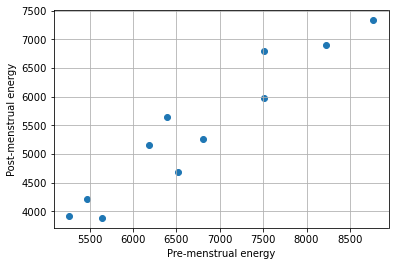

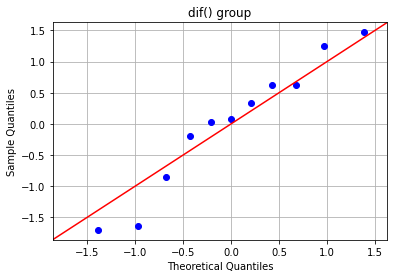

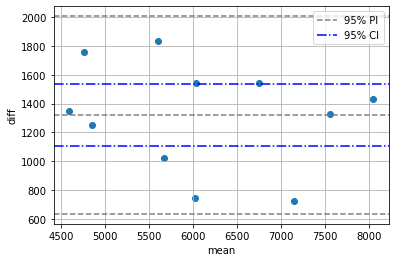

In [6]:
Energy = pd.read_csv('data/energy.csv', sep=',', na_values=".")
Energy['diff'] = Energy['pre'] - Energy['post']
print(Energy.describe())

## pre- vs. post-menstrual energy
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 1)
ax.scatter(Energy['pre'], Energy['post'])
ax.set_xlabel('Pre-menstrual energy')
ax.set_ylabel('Post-menstrual energy')
ax.grid()
plt.show()

## QQ plot
plt.rcParams.update({'font.size': 10})
sm.qqplot(Energy['diff'], fit=True, line='45')
plt.title('dif() group')
plt.grid()
plt.show()

## Bland-Altman plot
bland_altman_plot(Energy['pre'], Energy['post'])

2. Make the paired t-test analysis.

In [8]:
# First, we need to test the hypothesis std_control = std_fish_oil
# F_obs = [largest observed std/ smallest observed std]^2
std_pre = np.std(Energy['pre'])
std_post = np.std(Energy['post'])
print('Pre-mens group: std =', std_pre)
print('Post-mens group: std =', std_post)

if std_pre <= std_post:
    F_obs = (std_pre/std_post)**2
else:
    F_obs = (std_post/std_pre)**2

print('F_obs =', F_obs)
p_value = stats.f.cdf(F_obs, len(Energy['pre']) - 1, len(Energy['post']) - 1)
print('p-value =', p_value)

#  the p-value is high -> we can accept the hypothesis
print('2-sided ttest: ', stats.ttest_ind(Energy['pre'], Energy['post']))

# the p-value  for the t-test is not that small...

Pre-mens group: std = 1088.9717646166182
Post-mens group: std = 1160.2042781088805
F_obs = 0.8809764791946213
p-value = 0.42255317641497786
2-sided ttest:  Ttest_indResult(statistic=2.6242022946075902, pvalue=0.01625219443111871)


## Exercise 3.2
Ten persons killed by car accidents had their alcohol concentration measured in two
blood samples: one from the left leg and one from the heart, alcohol.dta.
1. Plot the data. What do you see in your plots? Is it reasonable to describe the
difference between the concentrations measured in the leg and in the heart by a
normal distribution?

              leg       heart
count   10.000000   10.000000
mean   170.000000  175.600000
std     74.619032   74.198233
min     68.000000   80.000000
25%    103.250000  101.750000
50%    180.000000  186.000000
75%    223.250000  223.000000
max    265.000000  277.000000


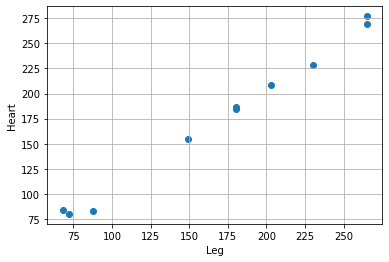

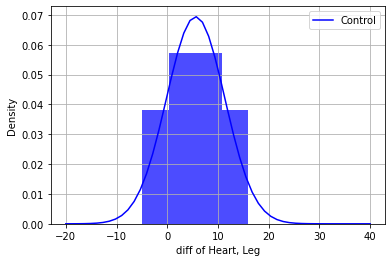

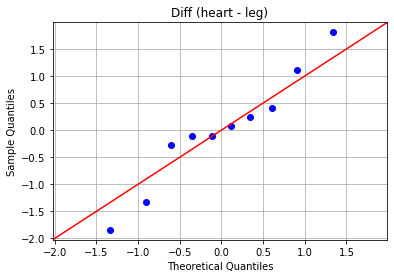

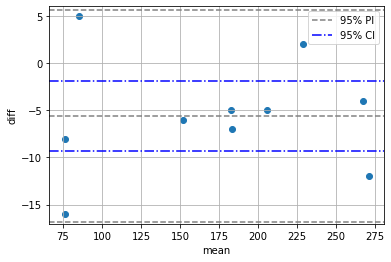

In [5]:
Alcohol_lvls = pd.read_csv('data/alcohol.csv', sep=',', na_values=".")
print(Alcohol_lvls.describe())
Alcohol_lvls['diff'] = Alcohol_lvls['heart'] - Alcohol_lvls['leg']

## Scatter plot
plt.rcParams.update({'font.size': 10})
plt.scatter(Alcohol_lvls['leg'], Alcohol_lvls['heart'])
#plt.title('Diff (heart - leg)')
plt.xlabel('Leg')
plt.ylabel('Heart')
plt.grid()
plt.show()

## histogram
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 1)
mu, std = stats.norm.fit(Alcohol_lvls['diff'])
x = np.linspace(-20, 40)
pdf_data = stats.norm.pdf(x, mu, std)
ax.plot(x, pdf_data, color='blue', label='Control')
ax.hist(Alcohol_lvls['diff'], bins=4, density='True', color='blue', alpha=0.7)
ax.set_xlabel('diff of Heart, Leg')
ax.set_ylabel('Density')
ax.legend()
ax.grid()
plt.show()

## QQ plot
plt.rcParams.update({'font.size': 10})
sm.qqplot(Alcohol_lvls['diff'], fit=True, line='45')
plt.title('Diff (heart - leg)')
plt.grid()
plt.show()

# Blan-altman
bland_altman_plot(Alcohol_lvls['leg'], Alcohol_lvls['heart'])

# swarml´plot <- look into it
# do a plot

# It seems to follow a normal distribution - but it's hard to be sure with so
# few data points.  The QQ-plot appears to follow a line, and deviations are not
# more apparent the those in the qq-catalog for n=10

2. Estimate the mean and the standard deviation of the difference between the
concentrations measured in the leg and in the heart.

In [28]:
print('mean difference:', np.mean(Alcohol_lvls['diff']),
      '\nstd:', np.std(Alcohol_lvls['diff']))

mean difference: 5.6 
std: 5.748043145279966


3. Calculate 95% confidence intervals for the mean difference between
concentrations measured in the leg and in the heart

4. Calculate 95% prediction intervals for the observed difference between
concentrations measured in the leg and in the heart

In [20]:
print('95% CI:', mean_CI_data(Alcohol_lvls['diff']))
print('95% PI:', mean_PI_data(Alcohol_lvls['diff']))

95% CI: (5.6, 1.844611811750422, 9.355388188249577)
95% PI: (5.6, -5.666164564748733, 16.866164564748733)


5. Write a short conclusion on the difference between the alcohol concentration
measure in left leg and from the heart. The conclusion should contain information
on size of the possible difference and a discussion on the validity of the
assumptions behind the statistical analysis

In [30]:
std_leg = np.std(Alcohol_lvls['leg'])
std_heart = np.std(Alcohol_lvls['heart'])
print('Leg group: std =', std_leg)
print('Heart group: std =', std_heart)

if std_leg >= std_heart:
    F_obs = (std_leg/std_heart)**2
else:
    F_obs = (std_heart/std_leg)**2

print('F_obs =', F_obs)
p_value = stats.f.cdf(F_obs, len(Alcohol_lvls['leg']) - 1, len(Alcohol_lvls['heart']) - 1)
print('p-value =', p_value)

print('\nThe p-value of 55% means that the difference may be due to sampling variance\n-> '
      'we can accept that std_leg = std_heart. \nTherefore, we can apply '
      'a t-test to the data \n')
print('2-sided ttest: ', stats.ttest_ind(Alcohol_lvls['leg'], Alcohol_lvls['heart']))

Leg group: std = 70.7898297780126
Heart group: std = 70.39062437569368
F_obs = 1.011374736621162
p-value = 0.5065830053339329

The p-value of 55% means that the difference may be due to sampling variance
-> we can accept that std_leg = std_heart. 
Therefore, we can apply a t-test to the data 

2-sided ttest:  Ttest_indResult(statistic=-0.1682859926297223, pvalue=0.8682347738746051)


We found a very high p-value when comparing the two samples, p=86%. Therefore, we can
conclude that the difference observed is NOT statistically significant. We cannot reject the
null hypothesis. However, the sample size is very small - maybe there is a better test?

maybe to a bootstrap analysis to this one - good for small samples according to the class!!


 Sample sizes: Data 1: 10  Data 2: 10 
 Number of permutations:  1000

 p-value:  0.851


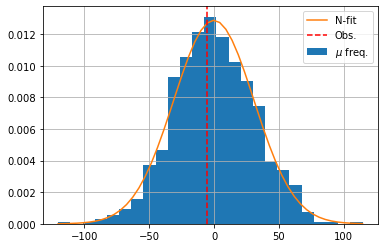

In [33]:
p1, p2, p3 = BootStrap(Alcohol_lvls['leg'],Alcohol_lvls['heart'], n=1000)

## Exercise 3.3
The table below contains the systolic blood pressure of 16 patients before and after one
week’s treatment with captopril or placebo. Data are from the randomized controlled
trial: Effect of captopril on kidney function in insulin-dependent diabetic patients with
nephropathy (Hommel et al., BMJ, 1986).

1. Reconstruct the original analysis of the authors. What is wrong in their analysis of
the data and their interpretation of the result?
2. Make a more correct analysis of the data. What is your conclusion?

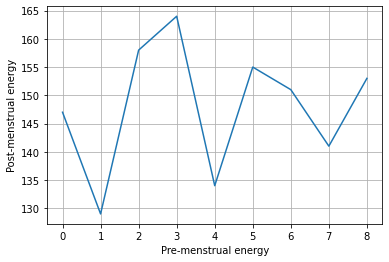

In [41]:
Captopril = pd.read_csv('data/captopril.csv', sep=',', na_values=".")
Group_cap = Captopril.loc[Captopril['group']=='captopril']
Group_plac = Captopril.loc[Captopril['group']=='placebo']

plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 1)
ax.plot(Group_cap['baseline'])
ax.set_xlabel('Pre-menstrual energy')
ax.set_ylabel('Post-menstrual energy')
ax.grid()
plt.show()

## Exercise 3.4
We return to the data set with heart period for physically active and passive persons,
hp.dta. It is well-established that the heart rate is lower at night compared to during the
day and that the physically active persons have a lower pulse at rest (compared to persons
that are not physically active).
Here we want to compare the “day-night change” for the two types of persons.

1. Make a statistical analysis that compares the difference between the day and night
heart periods for the two groups.
Write a short conclusion containing information on size of the possible difference
and a discussion on the validity of the assumptions behind the statistical analysis.
Another choice is to consider the ratio, i.e. analysing log(night/day).

2. Make a statistical analysis that uses this measure to compare the two groups.
Write a short conclusion containing information on size of the possible difference
(both on the log scale and on the original scale) and a discussion on the validity of
the assumptions behind the statistical analysis.


3. Compare what you found in 1 and 2 above. Which analysis gives the “best”
answer to the question: “Does size of the day to night change depend on whether
or not you are physically active?”


## Exercise 3.5